In [2]:
import data_analysis_funcs as daf
import matplotlib.pyplot as plt

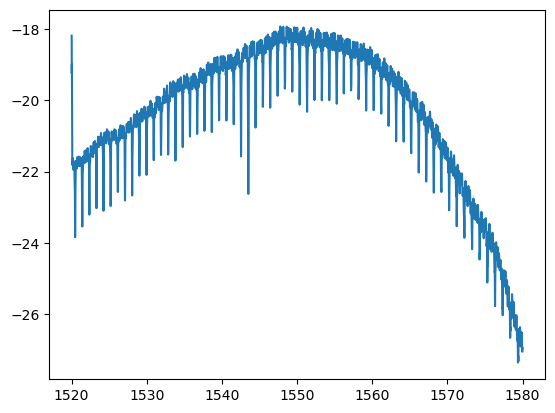

In [3]:
data_analyse_file="sg_rr_100_030 2023-12-08 16-08-32.csv"
wvlen_array,pow_array=daf.get_wavlen_and_pow_arrays(data_analyse_file)
daf.plot_visualise(wvlen_array,pow_array, full_range=True)

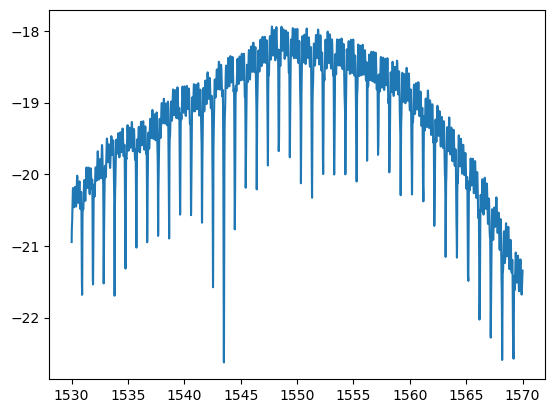

1530.0
1570.0


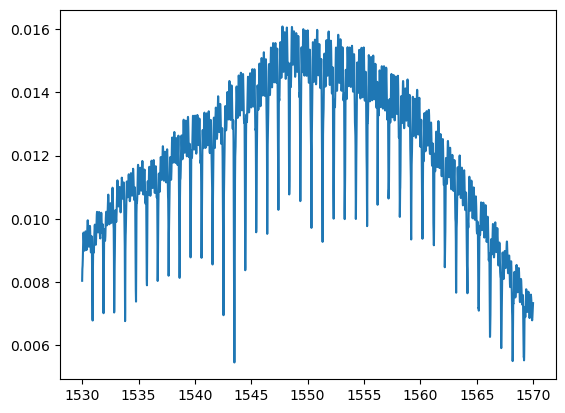

In [5]:
start_point_index=1000
end_point_index=5001
daf.plot_visualise(wvlen_array,pow_array,full_range=False,start_index=start_point_index,stop_index=end_point_index)
wvlen_peak_search=wvlen_array[start_point_index:end_point_index] #selects wavelengths to search through
power_peak_search_dBm=pow_array[start_point_index:end_point_index] # selects powers to search though
power_peak_search=daf.vector_dBm_to_mW(power_peak_search_dBm) #converts powers to mW
print(wvlen_peak_search[0])
print(wvlen_peak_search[-1])
plt.plot(wvlen_peak_search,power_peak_search)
plt.show()
print(power_peak_search)

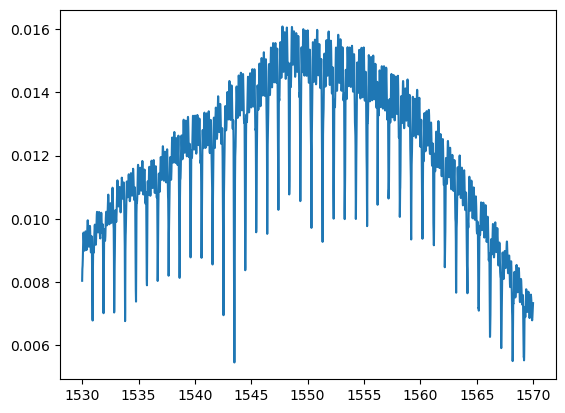

0
[]


In [6]:
wvlen_step_size=0.01
approx_fsr=1
promin_use=0.5
dist_use=(approx_fsr/2)/wvlen_step_size
#dist_use=1
peak_locs,n_peaks,peak_wavelens,peak_powers=daf.give_peak_locs(wvlen_step_size,approx_fsr,promin_use,dist_use,wvlen_peak_search,power_peak_search)
plt.plot(wvlen_peak_search,power_peak_search)
plt.scatter(peak_wavelens,peak_powers,color="red", marker="x")
plt.show()
print(n_peaks)#just added for check
print(peak_wavelens)#check

In [7]:
fsr_values=daf.calc_fsrs(peak_wavelens)
fsr_mean,fsr_error=daf.fsr_avg_and_error(fsr_values)
print(fsr_values)
print(fsr_mean)
print(fsr_error)

[]
nan
nan


c:\Users\TamCoding\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\TamCoding\anaconda3\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\TamCoding\anaconda3\Lib\site-packages\numpy\core\_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\TamCoding\anaconda3\Lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\TamCoding\anaconda3\Lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Now to calculate peak widths below:

In [ ]:
peak_width_data=daf.get_peak_FWHM(wvlen_step_size,approx_fsr,promin_use,dist_use,wvlen_peak_search,power_peak_search)
peak_widths=peak_width_data[0]
print(peak_widths)
peak_width_heights=peak_width_data[1]
peak_width_lefts=peak_width_data[2]
peak_width_rights=peak_width_data[3]
daf.plot_lines_FWHM(peak_width_heights,peak_width_lefts,peak_width_rights,wvlen_peak_search,power_peak_search)


Now calculating mean and standard error on FWHM using same func as for fsr:

In [ ]:
mean_FWHM,FWHM_error=daf.fsr_avg_and_error(peak_widths)
print(mean_FWHM)
print(FWHM_error)

Now to to calculate Q factor, and its error, and Q^3/R^2, and its error.

In [ ]:
Q_factor_list=peak_wavelens/peak_widths
mean_Q_factor,Q_factor_error=daf.fsr_avg_and_error(Q_factor_list)
print(mean_Q_factor)
print(Q_factor_error)


In [ ]:
radius=
radius_error=
Qcubed_over_Rsquared,Qcubed_over_Rsquared_error=daf.calc_Q3overR2(mean_Q_factor,Q_factor_error,radius,radius_error)
print(Qcubed_over_Rsquared)
print(Qcubed_over_Rsquared)